## ENVIRONMENT SET-UP

In [146]:
# importing of necessary libraries and packages

import numpy as np
import pandas as pd

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Engineering, Data Splitting, Machine Learning, Metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif # feature selection

# ROC and AUC evaluation and visualisation
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression

# For Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis and Data Pre-processing

EDA (Exploratory Data Analysis) and Data Pre-processing are crucial steps in the data science process, but they serve different purposes and are applied at different stages.

EDA involves exploring and investigating the data to understand its characteristics, identify patterns, discover anomalies, and formulate hypotheses. This initial step is about getting to know our data intimately before we start any serious modeling or analysis. 

Data Pre-processing is the stage where we prepare the data for modeling or analysis. It typically happens after EDA and before feature engineering and model building. Typical steps of Data Pre-processing includes:

* Cleaning: Handling missing values (imputation or removal), removing duplicates, correcting inconsistencies, and dealing with outliers.
* Transformation: Scaling numerical features (normalization or standardization), encoding categorical variables (one-hot encoding or label encoding), and converting data types.
* Reduction: Reducing the dimensionality of the data (feature selection or dimensionality reduction techniques like PCA).

Essentially, EDA and Data Pre-processing are primarily concerned with understanding and preparing data for analysis or modeling and this is what we will start with when initially loading the dataset.

In [202]:
# loading the data and the variable description using the link of the dataset on github
url_data = (r"https://raw.githubusercontent.com/chrisbw/Hollard-Data-Science/refs/heads/main/data.csv")
url_desc = (r"https://raw.githubusercontent.com/chrisbw/Hollard-Data-Science/refs/heads/main/VariableDescription.csv")

# reading of data using pandas read_csv function 
df = pd.read_csv(url_data)
data_desc = pd.read_csv(url_desc)

# quick glance of the dataset shape
num_rows, num_columns = df.shape
print(f"The focus is an insurance dataframe that contains {num_rows} rows and {num_columns} columns.")

The focus is an insurance dataframe that contains 7160 rows and 14 columns.


### The dataframe variable description is as follows:


**Customer Id:** Identification number for the Policy holder

**YearOfObservation:** Year of observation for the insured policy

**Insured_Period:** Duration of insurance policy in Olusola Insurance. (Ex: Full year insurance, Policy Duration = 1; 6 months = 0.5)

**Residential:** is the building a residential building or not

**Building_Painted:** Is the building painted or not (N-Painted, V-Not Painted)

**Building_Fenced:** Is the building fence or not (N-Fenced, V-Not Fenced)

**Garden:** building has garden or not (V-has garden; O-no garden)

**Settlement:** Area where the building is located (R-rural area; U-urban area)

**Building Dimension:** Size of the insured building in meters squared

**Building_Type:** The type of building (Type 1, 2, 3, 4)

**Date_of_Occupancy:** Date building was first occupied

**NumberOfWindows:** Number of windows in the building

**Geo Code:** Geographical Code of the Insured building

**Claim:** Target variable. (0: no claim, 1: at least one claim over insured period)

In [203]:
# view of the first 10 rows of our dataset
print(f"The first 10 rows of our dataset can provide a quick visual overview of the type of variables each attribute contains \nas indicated in the variable description above. These could be numerical, categorical, ordinal, etc")
print()
df.head(10).transpose()

The first 10 rows of our dataset can provide a quick visual overview of the type of variables each attribute contains 
as indicated in the variable description above. These could be numerical, categorical, ordinal, etc



,0,1,2,3,4,5,6,7,8,9
Customer Id,H14663,H2037,H3802,H3834,H5053,H4977,H7390,H14488,H19355,H18601
YearOfObservation,2013,2015,2014,2013,2014,2012,2012,2015,2014,2015
Insured_Period,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Residential,0,0,0,0,0,0,0,0,0,0
Building_Painted,N,V,N,V,V,V,N,N,V,V
Building_Fenced,V,N,V,V,N,N,V,V,N,N
Garden,V,O,V,V,O,O,V,V,O,O
Settlement,U,R,U,U,R,R,U,U,R,R
Building Dimension,290.0,490.0,595.0,2840.0,680.0,535.0,2830.0,4952.0,2735.0,520.0
Building_Type,1,1,1,1,1,1,1,1,1,1


In [204]:
# the type of variables can be confirmed by checking the column types. 
# this also helps to determine if the column types rightfully align with what has been outlined in the variable description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


Carefully considering the different types of columns in the dataset. The first thing to understand is the type of information under each feature and any unique values present. This would show a somewhat detail of the composition of the data points under each variable. This would eventually be visually shown for easier understanding and readability.

The dataset information showed that a number of the columns are recognised as objects, floats, and integers. 

However, according to the variable description, the dataset contains dates (YearOfObservation and Date_of_Occupancy), categorical(Residential, Building_Painted, Building_Fenced, Garden, Settlement, Building_Type, NumberOfWindows, Geo_Code, Claim), and numerical (Insured_Period, Building Dimension) attributes.

The dates columns could be used either as categorical or date columns depending on the use case of our analysis and modeling. 

To convert the object type columns to columns, we would need to understand the reasoning behind doing so. 

* The 'object' data type is a general-purpose type for text or mixed data.

* The 'categorical' data type is optimized for columns with a limited set of unique values, offering better memory efficiency and performance for certain operations.

Thus, several of the object type columns are to be converted to categorical type variables. This however will be confirmed after viewing the unique values present under each object data type.

In [205]:
# function to extract the categorical and numerical attributes to group them for further analysis
def extract_cat_num(data):
    categorical_col = [col for col in df.columns if df[col].dtype == 'object']
    numerical_col = [col for col in df.columns if df[col].dtype == 'float64']
    return categorical_col,numerical_col

categorical_col, numerical_col = extract_cat_num(df)

In [206]:
# categorical attributes extracted from the dataframe
categorical_col

['Customer Id',
 'Building_Painted',
 'Building_Fenced',
 'Garden',
 'Settlement',
 'NumberOfWindows',
 'Geo_Code']

In [207]:
# to determine the unique values under each categorical attribute, which can help determine if there are any anomalies
for col in categorical_col:
    print('\nUnique Values in {} has\n{} '.format(col,df[col].value_counts()))
    print('\n')


Unique Values in Customer Id has
H14663    1
H19182    1
H1571     1
H15027    1
H15026    1
         ..
H5025     1
H19098    1
H16571    1
H16570    1
H7470     1
Name: Customer Id, Length: 7160, dtype: int64 



Unique Values in Building_Painted has
V    5382
N    1778
Name: Building_Painted, dtype: int64 



Unique Values in Building_Fenced has
N    3608
V    3552
Name: Building_Fenced, dtype: int64 



Unique Values in Garden has
O    3602
V    3551
Name: Garden, dtype: int64 



Unique Values in Settlement has
R    3610
U    3550
Name: Settlement, dtype: int64 



Unique Values in NumberOfWindows has
   .    3551
4        939
3        844
5        639
2        363
6        306
7        211
8        116
1         75
>=10      67
9         49
Name: NumberOfWindows, dtype: int64 



Unique Values in Geo_Code has
6088     143
33063    137
6083     113
13206     98
31555     87
        ... 
59650      1
59656      1
60057      1
60172      1
2B353      1
Name: Geo_Code, Length: 1307,

In [208]:
numerical_col

['Insured_Period', 'Building Dimension', 'Date_of_Occupancy']

Observations:

* The Customer Id column is a unique attribute.
* The unique values in NumberOfWindows show a category of 1 to greater and equal to 10 for each building - however, it also includes 3551 rows that have a period symbol representing the number of windows. This brings to question if this is considered a missing value or  a building with no (0) windows. Requires further investigation.
* The YearOfObservation, Residential, Building_Type, Date_of_Occupancy and Claim columns have been wrongly recognised as numerical columns and require conversion.
* The Claim attribute is our target. Which is a categorical column. 
* The dates columns (YearOfObservation and Date_of_Occupancy) could be used either as categorical or date columns depending on the use case of our analysis and modeling. At this point they will be considered categorical.

To convert the object type columns to columns, we would need to understand the reasoning behind doing so. 

1. The 'object' data type is a general-purpose type for text or mixed data.

2. The 'categorical' data type is optimized for columns with a limited set of unique values, offering better memory efficiency and performance for certain operations.

Thus, several of the object type columns are to be converted to categorical type variables.

In [209]:
# changing of column types
# first, the Date_of_Occupancy column has float values
# which we first convert to integer to get rid of the decimal before converting to categorical
df['Date_of_Occupancy'] = pd.to_numeric(df['Date_of_Occupancy'], errors='coerce').astype('Int64')
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Customer Id,H14663,H2037,H3802,H3834,H5053,H4977,H7390,H14488,H19355,H18601
YearOfObservation,2013,2015,2014,2013,2014,2012,2012,2015,2014,2015
Insured_Period,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Residential,0,0,0,0,0,0,0,0,0,0
Building_Painted,N,V,N,V,V,V,N,N,V,V
Building_Fenced,V,N,V,V,N,N,V,V,N,N
Garden,V,O,V,V,O,O,V,V,O,O
Settlement,U,R,U,U,R,R,U,U,R,R
Building Dimension,290.0,490.0,595.0,2840.0,680.0,535.0,2830.0,4952.0,2735.0,520.0
Building_Type,1,1,1,1,1,1,1,1,1,1


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   Int64  
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: Int64(1), float64(2), int64(4), object(7)
memory usage: 790.2+ KB


In [211]:
# list of columns to convert to categorical
columns_to_convert = [
    'YearOfObservation', 'Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 
    'Settlement', 'Building_Type','NumberOfWindows', 'Date_of_Occupancy', 'Geo_Code', 'Claim'
]

# convert the specified columns to categorical
df[columns_to_convert] = df[columns_to_convert].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Customer Id         7160 non-null   object  
 1   YearOfObservation   7160 non-null   category
 2   Insured_Period      7160 non-null   float64 
 3   Residential         7160 non-null   category
 4   Building_Painted    7160 non-null   category
 5   Building_Fenced     7160 non-null   category
 6   Garden              7153 non-null   category
 7   Settlement          7160 non-null   category
 8   Building Dimension  7054 non-null   float64 
 9   Building_Type       7160 non-null   category
 10  Date_of_Occupancy   6652 non-null   category
 11  NumberOfWindows     7160 non-null   category
 12  Geo_Code            7058 non-null   category
 13  Claim               7160 non-null   category
dtypes: category(11), float64(2), object(1)
memory usage: 308.1+ KB


In [212]:
# determining the unique values contained within our target attribute Claim
print('\nUnique Values in {} has\n{} '.format('Claim',df['Claim'].value_counts()))
print('\n')


Unique Values in Claim has
0    5526
1    1634
Name: Claim, dtype: int64 




Our target variable 'Claim' has been observed to be imbalanced, with 5,526 observations indicating that the building has at least a claim over the insured period and 1,634 of the observations indicating that the building doesn’t have a claim over the insured period.

After conversion, it is also clear from the count that there exists missing values based on the total expected rows and the count of non-null rows in the information displayed above. The missing values can be further analysed to understand the extent at which they occur. 

The potentially missing values in NumberOfWindows has to also be explored, to understand what the symbol may be trying to represent. To do this, we begin to visualise the relationships between the variables.

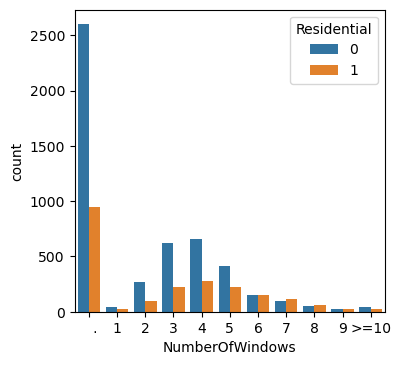

In [158]:
# visualising the distribution of buildings in residential (1) and non-residential (0) areas and the number of windows each building has
plt.figure(figsize=(4, 4), dpi=100)
sns.countplot(x='NumberOfWindows',hue="Residential", data=df)
plt.show()

According to the visualisation, a large number of buildings with an unknown number of windows are found in non-residential areas. The second largest number are buildings found in residential areas. Non-residential areas are zones designated for purposes other than living or dwelling and contain structures that utilise space in a manner that does not require or have the need for the same infrastructure found in residential builds. Non-residential areas include:

- Commercial:Office buildings, shopping malls, retail stores, restaurants, and hotels.
- Industrial: Factories, warehouses, manufacturing plants, and industrial parks.
- Institutional: Schools, universities, hospitals, government buildings, and religious institutions.
- Recreational: Parks, sports complexes, theaters, and entertainment venues.
- Agricultural: Farms, barns, greenhouses, and storage facilities for agricultural products.
- Transportation Hubs: Airports, train stations, bus terminals, and parking garages.
- Utilities and Infrastructure: Power plants, water treatment facilities, and communication towers.

Windowless infrastructure that can also be found in residential areas can also include storage facilities and parking garages. These various structures can be insured to protect against a wide range of potential risks such as property damage. The presence of windows in non-residential buildings depends on the purpose and design of the building.

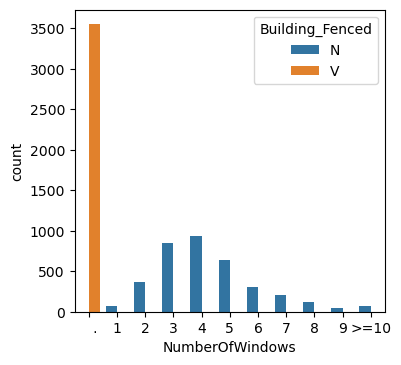

In [135]:
# visualising the distribution of buildings that are fenced (N) and not fenced (V) areas and the number of windows each building has
plt.figure(figsize=(4, 4), dpi=100)
sns.countplot(x='NumberOfWindows',hue="Building_Fenced", data=df)
plt.show()

The above visualisation indicates that all the buildings with the symbol '.' indicating number of windows are not fenced (V). This could be another indicator that these buildings are those that typically do not have windows such as those found in non-residential areas or commercial buildings and parking garages that can be found in residential areas.

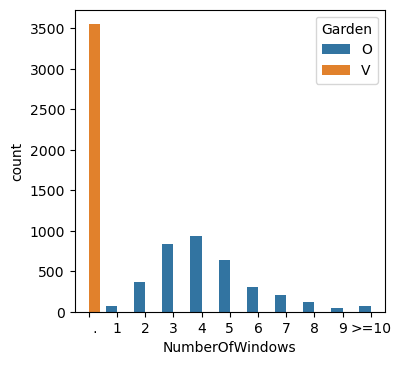

In [136]:
# visualising the distribution of buildings that are fenced (N) and not fenced (V) areas and the number of windows each building has
plt.figure(figsize=(4, 4), dpi=100)
sns.countplot(x='NumberOfWindows',hue="Garden", data=df)
plt.show()

The above visualisation shows that the buildings with the symbol '.' for the number of windows that a building has do not have a garden and could also indicate industrial infrastructure such as factories, warehouses or parking garages - ruling out that they are not residential. This can still be investigated further.

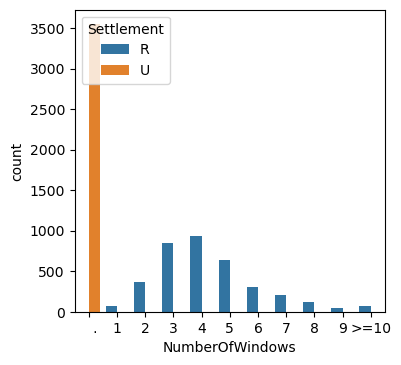

In [137]:
# visualising the distribution of buildings that are fenced (N) and not fenced (V) areas and the number of windows each building has
plt.figure(figsize=(4, 4), dpi=100)
sns.countplot(x='NumberOfWindows',hue="Settlement", data=df)
plt.show()

The above visualisation shows that the settlement at which these buildings with the '.' symbol for the number of windows that a building are located in urban areas. Urban and rural areas differ significantly in terms of population density, land use, infrastructure, and types of buildings. Urban areas have a large population density and are primarily used for residential, commercial, and industrial purposes. This does not confirm nor deny if the buildings have a typical requirement for windows or not, however, they state their specific location of buildings in those locations with an unknown number of windows.

The analysis has brought me to the conclusion that these buildings could be considered windowless and thus the symbol '.' representing the Number of windows will be converted to a zero (0) going forward.

In [213]:
# now to edit the categorical data of the NumberOfWindows attribute
df['NumberOfWindows'].replace(to_replace = {'   .':'0'},inplace=True)
# to determine the unique values under each categorical attribute, which can help determine if there are any anomalies
print('\nUnique Values in {} has\n{} '.format('NumberOfWindows',df['NumberOfWindows'].value_counts()))
print('\n')


Unique Values in NumberOfWindows has
0       3551
4        939
3        844
5        639
2        363
6        306
7        211
8        116
1         75
>=10      67
9         49
Name: NumberOfWindows, dtype: int64 




Now we can look at any missing values that could be found in the other attributes within our dataset.

In [214]:
# Visualizing the missing data using a matrix display image
# Percentage of missing data per column
(df.isnull().sum() / df.shape[0] * 100.00).round(2)

Customer Id           0.00
YearOfObservation     0.00
Insured_Period        0.00
Residential           0.00
Building_Painted      0.00
Building_Fenced       0.00
Garden                0.10
Settlement            0.00
Building Dimension    1.48
Building_Type         0.00
Date_of_Occupancy     7.09
NumberOfWindows       0.00
Geo_Code              1.42
Claim                 0.00
dtype: float64

In [215]:
df.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

At most, less than 10% of the values within the dataset - specifically within the Date_of_Occupancy attribute are missing. Depending on the extent at which there are missing values, they can be dealt with in the following ways:

* All the rows with missing data can be eliminated
* All the columns with a lot of missing data can be eliminated
* Missing data can be imputated

Imputation of missing data can be performed by replacing replacing the values with the mean, median or mode, or using k-nearest neighbour to replace the data values with similar computed values based on similarity and nearness.

Regarding our current dataset, the missing values are imputated using the mean and mode.

In [216]:
# fill missing values with mode
df['Garden'].fillna(df['Garden'].mode()[0],inplace=True)
df['Date_of_Occupancy'].fillna(df['Date_of_Occupancy'].mode()[0],inplace=True)
df['Geo_Code'].fillna(df['Geo_Code'].mode()[0],inplace=True)

# fill missing values with mean
df['Building Dimension'].fillna(df['Building Dimension'].mean(),inplace=True)

# verify that there are no missing values
(df.isnull().sum() / df.shape[0] * 100.00).round(2)

Customer Id           0.0
YearOfObservation     0.0
Insured_Period        0.0
Residential           0.0
Building_Painted      0.0
Building_Fenced       0.0
Garden                0.0
Settlement            0.0
Building Dimension    0.0
Building_Type         0.0
Date_of_Occupancy     0.0
NumberOfWindows       0.0
Geo_Code              0.0
Claim                 0.0
dtype: float64

# FEATURE ENGINEERING

Feature engineering occurs after cleaning the dataset and before splitting the data. Feature engineering transforms raw data into meaningful features that improve model performance.

Now that we have dealt with missing features and converted our data types, we shall now consider if our dataset requires the scaling of numerical features, encoding categorical variables and dimensionality reduction.

Our dataset contains a column called Insured_Period. According to the variable description, these values are to represent the duration of insurance policy in Olusola Insurance. (Ex: Full year insurance, Policy Duration = 1; 6 months = 0.5). Further exploration is required to understand this numerical column.

In [218]:
print('\nUnique Values in {} has\n{} '.format('Insured_Period',df['Insured_Period'].value_counts()))
print('\n')


Unique Values in Insured_Period has
1.000000    5325
0.997268     547
0.000000     165
0.747945      60
0.495890      49
            ... 
0.435616       1
0.308743       1
0.437158       1
0.578082       1
0.030137       1
Name: Insured_Period, Length: 401, dtype: int64 




The values above show that the column Insured_Period has values ranging from 0.0 to 1.0, which slightly opposes the initial understanding of the description outlined of our attribute in terms of expected values to indicate that an insured period of 1 year is represented by the value 1 and 6 months is represented by the value 0.5. However, this does align with the intention of the attribute. It is thus understood that the value of 0.0 indicates that the insured period is 0 months, 0.5 would indicate that the insured period is 6 months (half a year or 0.5 year) and 1.0 indicates that the insured period is 12 months (1 full year of insurance or coverage). The values in between 0.0 and 1.0 indicate varying lengths of insured period within a 12-month (full year) period. This attribute shall remain a numerical value.

The Building Dimension attribute is a column that indicates the area of the building in meters squared. This value is numerical, and shall remain so.

The difference in scale between these values require normalization/standarization. The reason for applying scaling/normalization is because:

1. Many machine learning algorithms are sensitive to the scale of the input features. Features with larger values can dominate the model, leading to biased results. Scaling ensures that all features contribute equally to the model.
2. Scaling can improve the convergence speed and stability of some algorithms, especially gradient-based methods like linear regression, logistic regression, and neural networks.  These algorithms often converge faster when the features are on a similar scale.
3. If one feature has a much larger range of values than others, it can overshadow the importance of other features. Scaling prevents this dominance.


Our feature engineering shall include the following steps:

1. First we drop the Customer Id column, as it contains unique values.
2. We then encode the categorical variables using one-hot encoding.
3. Scale the numerical features:to fit within the same range of 0-1.
4. We split the data into test and train sets
5. Then we perform feature selection using a filter method.

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Customer Id         7160 non-null   object  
 1   YearOfObservation   7160 non-null   category
 2   Insured_Period      7160 non-null   float64 
 3   Residential         7160 non-null   category
 4   Building_Painted    7160 non-null   category
 5   Building_Fenced     7160 non-null   category
 6   Garden              7160 non-null   category
 7   Settlement          7160 non-null   category
 8   Building Dimension  7160 non-null   float64 
 9   Building_Type       7160 non-null   category
 10  Date_of_Occupancy   7160 non-null   category
 11  NumberOfWindows     7160 non-null   category
 12  Geo_Code            7160 non-null   category
 13  Claim               7160 non-null   category
dtypes: category(11), float64(2), object(1)
memory usage: 308.1+ KB


# MODELING

In [222]:
# Drop Customer Id
df2 = df.drop(['Geo_Code','Customer Id'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   YearOfObservation   7160 non-null   category
 1   Insured_Period      7160 non-null   float64 
 2   Residential         7160 non-null   category
 3   Building_Painted    7160 non-null   category
 4   Building_Fenced     7160 non-null   category
 5   Garden              7160 non-null   category
 6   Settlement          7160 non-null   category
 7   Building Dimension  7160 non-null   float64 
 8   Building_Type       7160 non-null   category
 9   Date_of_Occupancy   7160 non-null   category
 10  NumberOfWindows     7160 non-null   category
 11  Claim               7160 non-null   category
dtypes: category(10), float64(2)
memory usage: 195.7 KB


In [223]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   YearOfObservation   7160 non-null   category
 1   Insured_Period      7160 non-null   float64 
 2   Residential         7160 non-null   category
 3   Building_Painted    7160 non-null   category
 4   Building_Fenced     7160 non-null   category
 5   Garden              7160 non-null   category
 6   Settlement          7160 non-null   category
 7   Building Dimension  7160 non-null   float64 
 8   Building_Type       7160 non-null   category
 9   Date_of_Occupancy   7160 non-null   category
 10  NumberOfWindows     7160 non-null   category
 11  Claim               7160 non-null   category
dtypes: category(10), float64(2)
memory usage: 195.7 KB


In [224]:
# separate features (X) and target (y)
X = df2.drop('Claim', axis=1)
y = df2['Claim']

# re-identify categorical and numerical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'category']
numerical_cols = [col for col in X.columns if X[col].dtype == 'float64']

# one-hot encode the categorical features
X_categorical_df = pd.get_dummies(X[categorical_cols], drop_first=True)

# scale the numerical features
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X[numerical_cols])
X_numerical_df = pd.DataFrame(X_numerical_scaled, columns=numerical_cols)

# combine the preprocessed features
X_processed = pd.concat([X_categorical_df, X_numerical_df], axis=1)

# then split into training and testing sets (applied before feature selection)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)


Train ROC AUC: 0.7348161799644307
Test ROC AUC: 0.7008936461647224


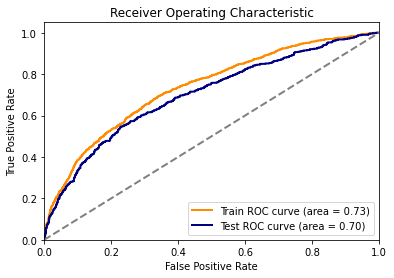

In [235]:
# training of our model
model = LogisticRegression()
model.fit(X_train, y_train)

# to get the probabilities for the training set
y_train_proba = model.predict_proba(X_train)[:, 1]  # Probabilities for class 1

# to also get the probabilities for the test set
y_test_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# to calculate ROC AUC for the training set
roc_auc_train = roc_auc_score(y_train, y_train_proba)
print("Train ROC AUC:", roc_auc_train)

# to also calculate ROC AUC for the test set
roc_auc_test = roc_auc_score(y_test, y_test_proba)
print("Test ROC AUC:", roc_auc_test)

# the plotting of the ROC curve for the training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_curve_train = auc(fpr_train, tpr_train)

plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (area = {roc_auc_curve_train:.2f})')

# the plot ROC curve for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_curve_test = auc(fpr_test, tpr_test)

plt.plot(fpr_test, tpr_test, color='navy', lw=2, label=f'Test ROC curve (area = {roc_auc_curve_test:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

An important recall:

The target variable is imbalanced, and for an imbalanced dataset, the model created is best evaluated using the ROC (Receiver Operating Characteristic) and AUC (Area Under the Curve). These metrics handle class imbalance better than evaluating the performance of a model using accuracy. These metrics focus on the model's ability to correctly classify both classes, regardless of their imbalance. AUC also particularly measures how well the model ranks positive instances higher than negative instances, which is particularly useful in this instance where we need to evaluate if a building will have an insurance claim during a certain period (1) or not (0).

Our model finally results in:
Train ROC AUC: 0.73
Test ROC AUC: 0.70